### - Mini Project

In [84]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import koreanize_matplotlib

In [85]:
DATA_FILE = '../data/전세계GDP.csv'
df = pd.read_csv(DATA_FILE)

## 분석 진행할 나라들만 뽑아오기
countries = ['United States', 'Japan', 'Korea, Republic of', 'Sweden', 'Norway', 'Denmark', "China, People's Republic of",
             'Vietnam', 'Venezuela', 'Nicaragua']

mask = df['GDP, current prices (Billions of U.S. dollars)'].isin(countries)

df = df[mask]

display(df)

,"GDP, current prices (Billions of U.S. dollars)",1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
37,"China, People's Republic of",303.55,289.215,285.139,306.013,314.832,310.709,301.471,328.305,409.363,...,18190.803,18307.816,18270.351,18749.759,19398.577,20650.754,22016.582,23451.376,24852.392,26336.991
47,Denmark,70.811,61.46,60.084,60.331,58.869,62.452,87.749,109.183,115.54,...,406.11,400.115,404.652,424.525,459.612,500.051,521.566,542.455,563.668,585.835
86,Japan,1129.378,1245.221,1158.731,1270.86,1345.825,1427.02,2120.084,2580.749,3125.725,...,5039.148,4263.231,4204.573,4019.382,4279.828,4463.634,4624.079,4820.609,4947.728,5119.885
91,"Korea, Republic of",66.517,74.287,79.912,89.621,99.75,103.764,119.966,152.241,205.479,...,1942.314,1799.363,1844.801,1875.388,1858.572,1936.617,2017.01,2099.702,2184.804,2271.152
127,Nicaragua,1.832,2.156,2.497,2.9,3.966,3.854,5.8,3.409,1.499,...,14.208,15.634,17.813,19.694,20.689,21.86,23.183,24.618,26.142,27.761
131,Norway,64.439,63.597,62.647,61.627,62.058,65.417,78.693,94.231,101.901,...,503.368,596.298,482.95,483.593,517.102,547.693,566.059,583.576,602.031,621.811
168,Sweden,140.151,127.935,112.912,103.682,107.978,112.932,149.282,181.81,205.868,...,631.693,575.071,578.991,603.715,662.318,711.503,740.513,770.062,800.502,832.1
188,United States,2857.325,3207.025,3343.8,3634.025,4037.65,4339,4579.625,4855.25,5236.425,...,23725.65,26054.6,27811.5,29298.025,30615.743,31821.293,33019.978,34258.401,35513.831,36814.251
192,Venezuela,69.841,78.367,79.998,79.672,57.826,59.865,60.877,46.854,60.378,...,56.615,89.013,102.377,119.803,82.767,79.916,no data,no data,no data,no data
193,Vietnam,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,29.501,...,370.076,411.068,433.008,459.472,484.726,511.059,545.213,583.731,624.103,666.786


In [86]:
## 각 나라별로 어떤 주의인지 체크하는 컬럼 만들어주기
ideology_map = {
    'United States': '민주자본주의',
    'Japan': '민주자본주의',
    'Korea, Republic of': '민주자본주의',
    
    'Sweden': '민주사회주의',
    'Norway': '민주사회주의',
    'Denmark': '민주사회주의',
    
    "China, People's Republic of": '공산자본주의',
    'Vietnam': '공산자본주의',
    
    'Venezuela': '공산사회주의',      
    'Nicaragua': '공산사회주의'
}
df['체제'] = df['GDP, current prices (Billions of U.S. dollars)'].map(ideology_map)


# Country, 체제, 나머지 연도들 순으로 재정렬
cols = df.columns.tolist()
new_cols = ['GDP, current prices (Billions of U.S. dollars)', '체제'] + [c for c in cols if c not in ['GDP, current prices (Billions of U.S. dollars)', '체제']]
df = df[new_cols]

## GDP, current prices (Billions of U.S. dollars) 열 이름 Country로 변경하기
df.rename(columns={df.columns[0]: 'Country'}, inplace=True)

## 중국과 한국 이름 바꿔주기
replace_map = {
    "China, People's Republic of": "China",
    'Korea, Republic of': 'Korea',   
}

df['Country'] = df['Country'].replace(replace_map)

df

,Country,체제,1980,1981,1982,1983,1984,1985,1986,1987,...,2021,2022,2023,2024,2025,2026,2027,2028,2029,2030
37,China,공산자본주의,303.55,289.215,285.139,306.013,314.832,310.709,301.471,328.305,...,18190.803,18307.816,18270.351,18749.759,19398.577,20650.754,22016.582,23451.376,24852.392,26336.991
47,Denmark,민주사회주의,70.811,61.46,60.084,60.331,58.869,62.452,87.749,109.183,...,406.11,400.115,404.652,424.525,459.612,500.051,521.566,542.455,563.668,585.835
86,Japan,민주자본주의,1129.378,1245.221,1158.731,1270.86,1345.825,1427.02,2120.084,2580.749,...,5039.148,4263.231,4204.573,4019.382,4279.828,4463.634,4624.079,4820.609,4947.728,5119.885
91,Korea,민주자본주의,66.517,74.287,79.912,89.621,99.75,103.764,119.966,152.241,...,1942.314,1799.363,1844.801,1875.388,1858.572,1936.617,2017.01,2099.702,2184.804,2271.152
127,Nicaragua,공산사회주의,1.832,2.156,2.497,2.9,3.966,3.854,5.8,3.409,...,14.208,15.634,17.813,19.694,20.689,21.86,23.183,24.618,26.142,27.761
131,Norway,민주사회주의,64.439,63.597,62.647,61.627,62.058,65.417,78.693,94.231,...,503.368,596.298,482.95,483.593,517.102,547.693,566.059,583.576,602.031,621.811
168,Sweden,민주사회주의,140.151,127.935,112.912,103.682,107.978,112.932,149.282,181.81,...,631.693,575.071,578.991,603.715,662.318,711.503,740.513,770.062,800.502,832.1
188,United States,민주자본주의,2857.325,3207.025,3343.8,3634.025,4037.65,4339,4579.625,4855.25,...,23725.65,26054.6,27811.5,29298.025,30615.743,31821.293,33019.978,34258.401,35513.831,36814.251
192,Venezuela,공산사회주의,69.841,78.367,79.998,79.672,57.826,59.865,60.877,46.854,...,56.615,89.013,102.377,119.803,82.767,79.916,no data,no data,no data,no data
193,Vietnam,공산자본주의,35.357,17.617,23.369,35.204,61.171,19.045,43.009,53.385,...,370.076,411.068,433.008,459.472,484.726,511.059,545.213,583.731,624.103,666.786


<Figure size 1600x600 with 0 Axes>

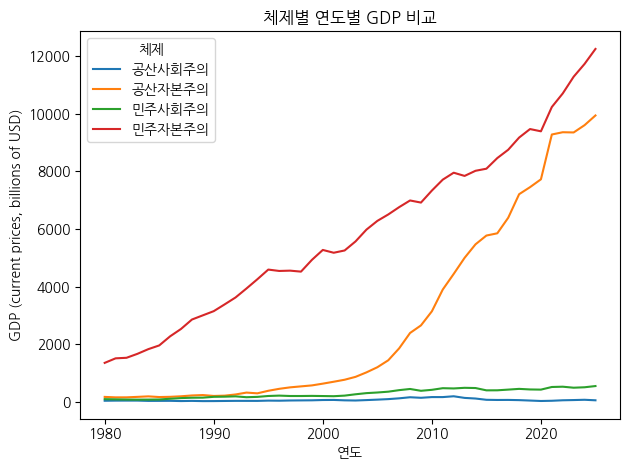

In [89]:
year_cols = [c for c in df.columns if str(c).isdigit() and int(c) <= 2025]

df_long = df.melt(
    id_vars=['Country', '체제'],
    value_vars=year_cols,
    var_name='연도',
    value_name='GDP'
)

# 연도는 숫자로
df_long['연도'] = df_long['연도'].astype(int)

df_long['GDP'] = pd.to_numeric(df_long['GDP'], errors='coerce')

df_ideology = (
    df_long
    .groupby(['체제', '연도'], as_index=False)['GDP']
    .mean()
)

pivot = df_ideology.pivot(index='연도', columns='체제', values='GDP')

plt.figure(figsize=(16, 6))
pivot.plot()
plt.xlabel('연도')
plt.ylabel('GDP (current prices, billions of USD)')
plt.title('체제별 연도별 GDP 비교')
plt.legend(title='체제')
plt.tight_layout()
plt.show()


위의 그래프를 보았을 때 자본주의가 GDP가 더욱 높은 값을 볼 수 있었고, 공산주의 보단 민주주의가 GDP가 높은 모습을 볼 수 있다.

-> 왜 민주주의에서 GDP가 더 높을까?

       체제  CivilLibertyIndex
0  공산사회주의           0.115000
1  공산자본주의           0.065000
2  민주사회주의           0.960000
3  민주자본주의           0.896667


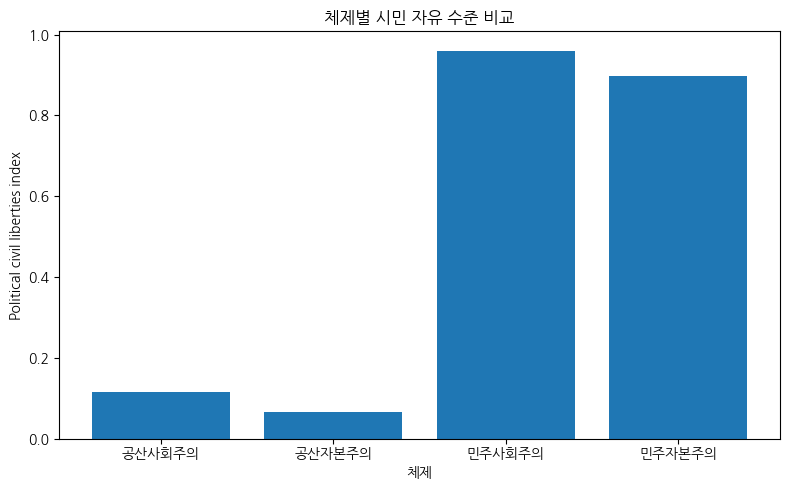

In [91]:
## 

civil_df = pd.DataFrame({
    'Country': [
        'Denmark', 'Norway', 'Sweden',
        'United States', 'Japan', 'Korea',
        'Venezuela', 'Vietnam', 'China', 'Nicaragua'
    ],
    'CivilLibertyIndex': [
        0.98, 0.95, 0.95,
        0.95, 0.93, 0.81,
        0.21, 0.09, 0.04, 0.02
    ]
})

df_merge = df.merge(civil_df, on='Country', how='left')

ideology_liberty = (
    df_merge
    .groupby('체제', as_index=False)['CivilLibertyIndex']
    .mean()
)
print(ideology_liberty)


plt.figure(figsize=(8, 5))
plt.bar(ideology_liberty['체제'], ideology_liberty['CivilLibertyIndex'])
plt.xlabel('체제')
plt.ylabel('Political civil liberties index')
plt.title('체제별 시민 자유 수준 비교')
plt.tight_layout()
plt.show()



### 민주주의가 공산주의보다 시민 자유 수준이 훨씬 높은 것을 볼 수 있다.